In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
path1 = "WSe/projwfc/"
path2 = "VSe/projwfc/"
path3 = "Sevac/projwfc/"
path4 = "Wvac/projwfc/"
F1 = -0.0447
F2 = -0.0526
F3 = -0.0818
F4 = 0.3187

def load_V(num, path):
    
    dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#1(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfs2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#2(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfp = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#3(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    dfd = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#4(d)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5',])
    df = pd.DataFrame()
    df['E'] = dfs1['E']
    df['s1'] = dfs1.filter(regex='LDOS')
    df['s2'] = dfs2.filter(regex='LDOS')
    df['p'] = dfp.filter(regex='LDOS')
    df['d'] = dfd.filter(regex='LDOS')
    df['LDOS'] = df.s1 + df.s2 +df.p + df.d
    return df

def load_W(num, path):
    
    dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#1(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfs2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#2(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfp1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#3(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    dfp2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#4(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    dfd = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#5(d)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5',])
    df = pd.DataFrame()
    df['E'] = dfs1['E']
    df['s1'] = dfs1.filter(regex='LDOS')
    df['s2'] = dfs2.filter(regex='LDOS')
    df['p1'] = dfp1.filter(regex='LDOS')
    df['p2'] = dfp1.filter(regex='LDOS')
    df['d'] = dfd.filter(regex='LDOS')
    df['LDOS'] = df.s1 + df.s2 +df.p1 + df.p2 + df.d
    return df

def load_Se(num, path):
    
    dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(Se)_wfc#1(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfp = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(Se)_wfc#2(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    df = pd.DataFrame()
    df['E'] = dfs1['E']
    df['s1'] = dfs1.filter(regex='LDOS')
    df['p'] = dfp.filter(regex='LDOS')
    df['LDOS'] = df.s1 +df.p
    return df

c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:45: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:27: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\u

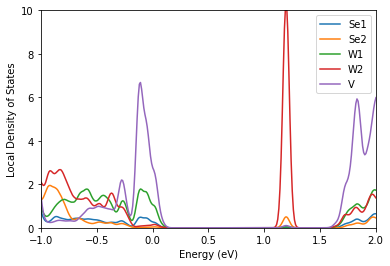

In [33]:
pth = path3



dfdict = {}
#WSe
if pth == path1:
    Fermi = F1
    dfdict['Se1'] = load_Se(57,pth)
    dfdict['Se2'] = load_Se(79,pth)
    dfdict['W1'] = load_W(9, pth)
    dfdict['W2'] = load_W(16, pth)
    dfdict['V'] = load_V(10, pth)
#VSe
elif pth == path2:
    Fermi = F2
    dfdict['Se1'] = load_Se(53,pth)
    dfdict['Se2'] = load_Se(77,pth)
    dfdict['W1'] = load_W(9, pth)
    dfdict['W2'] = load_W(15, pth)
    dfdict['V'] = load_V(10, pth)
#Sevac
elif pth == path3:
    Fermi = F3
    dfdict['Se1'] = load_Se(57,pth)
    dfdict['Se2'] = load_Se(70,pth)
    dfdict['W1'] = load_W(9, pth)
    dfdict['W2'] = load_W(22, pth)
    dfdict['V'] = load_V(10, pth)
#Wvac
elif pth == path4:
    Fermi = F4
    dfdict['Se1'] = load_Se(57,pth)
    dfdict['Se2'] = load_Se(77,pth)
    dfdict['W1'] = load_W(1, pth)
    dfdict['W2'] = load_W(13, pth)



for key in dfdict:
    plt.plot(dfdict[key].E-Fermi, dfdict[key].LDOS, label=key)

plt.xlim(-1,2)
plt.ylim(0,10)
plt.xlabel("Energy (eV)")
plt.ylabel("Local Density of States")
plt.legend()
plt.show()


